# Multiple Linear Regression on Customer Data - statsmodels

### Agenda

* Business Understanding
* Data Understanding
* Data Preparation
* Exploratory Data Analysis
* Building a Linear Model
* Evaluation

### Business Understanding

#### Problem Statement

A large child education toy company which sells edutainment tablets and gaming systems
both online and in retail stores wanted to analyze the customer data. They are operating
from last few years and maintaining all transactional information data. The given data
‘CustomerData.csv’ is a sample of customer level data extracted and processed for the
analysis from various set of transactional files.

The objectives of today’s activity are :
* Building a regression model to predict the customer revenue based on other factors and understand the influence of other attributes on revenue

#### Edutainment tablets: video games, television programmes, or other material, intended to be both educational and enjoyable.

### Identify right Error Metrics

##### Error Metrics for Regression

* Mean Absolute Error (MAE):

$$MAE = \dfrac{1}{n}\times\sum_{i = 1}^{n}|y_{i} - \hat{y_{i}}|$$


* Mean Squared Error (MSE):

$$MSE = \dfrac{1}{n}\times\sum_{i = 1}^{n}(y_{i} - \hat{y_{i}})^2$$


* Root Mean Squared Error (RMSE):

$$RMSE = \sqrt{\dfrac{1}{n}\times\sum_{i = 1}^{n}(y_{i} - \hat{y_{i}})^2}$$


* Mean Absolute Percentage Error (MAPE):

$$MAPE = \dfrac{100}{n}\times\dfrac{\sum_{i = 1}^{n}|y_{i} - \hat{y_{i}}|}{y_{i}}$$


### Loading the required libraries

In [29]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

import math

import statsmodels.formula.api as smf

from patsy import dmatrices

from IPython.display import Image

In [30]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.graphics.gofplots import ProbPlot

plt.style.use('seaborn') # pretty matplotlib plots

plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

### Loading the data

In [31]:
data=pd.read_csv("CustomerData.csv", header=0)

In [32]:
type(data)

pandas.core.frame.DataFrame

### Data Understanding

In [33]:
data.shape

(3209, 14)

#### Display the columns

In [34]:
data.columns

Index(['CustomerID', 'City', 'NoOfChildren', 'MinAgeOfChild', 'MaxAgeOfChild',
       'Tenure', 'FrquncyOfPurchase', 'NoOfUnitsPurchased', 'FrequencyOFPlay',
       'NoOfGamesPlayed', 'NoOfGamesBought', 'FavoriteChannelOfTransaction',
       'FavoriteGame', 'TotalRevenueGenerated'],
      dtype='object')

In [35]:
data.index

RangeIndex(start=0, stop=3209, step=1)

#### See the top rows of the data

In [36]:
data.head()

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
0,1001,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51
1,1002,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40
2,1003,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01
3,1004,1,1,6,6,261,11,9,365,34,11,Favorite,Uniform,125.00
4,1005,1,3,6,9,422,44,31,1066,102,44,Uniform,Uniform,335.05


#### Summary Statistics using describe()

Descriptive or Summary Statistic of the numeric columns

    It excludes character column and calculate summary statistics only for numeric columns

In [37]:
data.describe()

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,TotalRevenueGenerated
count,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000
mean,2605.000000,1.114054,2.128389,4.960735,7.990651,347.520411,16.269554,14.684014,1568.207853,93.627921,14.761608,168.477183
std,926.502833,0.317927,1.035092,3.714191,8.784084,90.520118,8.441670,7.182029,1810.630464,88.936372,8.773910,81.798528
min,1001.000000,1.000000,1.000000,0.000000,3.000000,100.000000,1.000000,1.000000,0.000000,0.000000,0.000000,100.000000
25%,1803.000000,1.000000,1.000000,4.000000,6.000000,301.000000,11.000000,10.000000,446.000000,37.000000,10.000000,116.640000
50%,2605.000000,1.000000,2.000000,5.000000,7.000000,368.000000,14.000000,13.000000,1029.000000,70.000000,14.000000,142.390000
75%,3407.000000,1.000000,3.000000,6.000000,8.000000,417.000000,19.000000,17.000000,2029.000000,119.000000,19.000000,191.250000
max,4209.000000,2.000000,11.000000,113.000000,113.000000,472.000000,119.000000,112.000000,27829.000000,1166.000000,115.000000,990.560000


# Summary statistics of the character columns

In [38]:
data.describe(include=['object'])

,FavoriteChannelOfTransaction,FavoriteGame
count,3209,3209
unique,2,2
top,Favorite,Uniform
freq,2637,3083


In [39]:
data.nunique()

CustomerID                      3209
City                               2
NoOfChildren                      10
MinAgeOfChild                     18
MaxAgeOfChild                     22
Tenure                           367
FrquncyOfPurchase                 66
NoOfUnitsPurchased                56
FrequencyOFPlay                 2089
NoOfGamesPlayed                  366
NoOfGamesBought                   61
FavoriteChannelOfTransaction       2
FavoriteGame                       2
TotalRevenueGenerated           1672
dtype: int64

In [40]:
data['FavoriteGame'].value_counts()

Uniform     3083
Favorite     126
Name: FavoriteGame, dtype: int64

#### Data type of each of the variable

In [41]:
data.dtypes

CustomerID                        int64
City                              int64
NoOfChildren                      int64
MinAgeOfChild                     int64
MaxAgeOfChild                     int64
Tenure                            int64
FrquncyOfPurchase                 int64
NoOfUnitsPurchased                int64
FrequencyOFPlay                   int64
NoOfGamesPlayed                   int64
NoOfGamesBought                   int64
FavoriteChannelOfTransaction     object
FavoriteGame                     object
TotalRevenueGenerated           float64
dtype: object

### Data Preparation

#### Observations:
    1. City is interpreted as numeric (which is actually categorical) and FavouriteGame, FavouriteChannelOfTransaction are interpreted as objects.
    2. max age of children is 113 which must be a wrong entry
    3. Summary statistics for CustomerID is not meaningful

So we now change these appropriately i.e, convert city, favourite game and favourite channel to category, exclude customer id from the data for analysis and treat wrong entry records

#### Check and delete CustomerID attribute

In [42]:
np.size(np.unique(data.CustomerID, return_counts=True)[0])

3209

    E.g. to understand above code

In [43]:
np.unique(data.FavoriteGame, return_counts=True)

(array(['Favorite', 'Uniform'], dtype=object),
 array([ 126, 3083], dtype=int64))

In [44]:
data.drop('CustomerID', axis=1, inplace=True)

#### Data type conversion 
    Using astype('category') convert 'City', 'FavoriteChannelOfTransaction', 'FavoriteGame' attributes to a categorical data type .

In [45]:
for col in ['City', 'FavoriteChannelOfTransaction', 'FavoriteGame']:
    data[col] = data[col].astype('category')

In [46]:
data.dtypes

City                            category
NoOfChildren                       int64
MinAgeOfChild                      int64
MaxAgeOfChild                      int64
Tenure                             int64
FrquncyOfPurchase                  int64
NoOfUnitsPurchased                 int64
FrequencyOFPlay                    int64
NoOfGamesPlayed                    int64
NoOfGamesBought                    int64
FavoriteChannelOfTransaction    category
FavoriteGame                    category
TotalRevenueGenerated            float64
dtype: object

# Observe how many records have values 113 as age of the children

In [47]:
data.loc[(data['MinAgeOfChild']==113) | (data['MaxAgeOfChild']==113),] #Only colon after comma implies consider all the rows

,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
570,1,2,4,113,205,17,17,158,51,8,Favorite,Uniform,218.85
584,1,2,3,113,379,6,6,242,32,0,Favorite,Uniform,100.44
599,1,2,113,113,436,26,26,10502,562,26,Favorite,Uniform,300.00
804,1,3,6,113,286,6,6,2137,72,6,Favorite,Uniform,102.50
878,1,2,5,113,202,9,8,483,68,9,Favorite,Uniform,105.00
897,1,2,5,113,355,16,16,1700,142,10,Favorite,Uniform,270.00
1097,1,3,6,113,432,12,12,2261,194,12,Favorite,Uniform,160.00
1144,1,3,5,113,405,16,14,4438,130,16,Uniform,Uniform,117.50
1413,1,3,4,113,171,15,11,1728,41,15,Favorite,Uniform,107.50
1621,1,2,6,113,187,10,9,731,39,10,Uniform,Uniform,115.00


In [48]:
data.shape

(3209, 13)

# Removing outliers



# Ignore records with age as 113

In [51]:
data=data.loc[(data['MinAgeOfChild'] !=113) & (data['MaxAgeOfChild']!=113),:] 

In [52]:
print (data.shape)

(3189, 13)


#### Missing Data

    pandas primarily uses the value np.nan to represent missing data. 

Check for missing value

    is.null() output boolean i.e. if missing value then true else false. 

    sum function counts 'true' thus gives total number of missing values

In this case there are no missing values. However if we find any missing values in the data, as a rule of thumb


    If the perticular row/column has more number of missing values then drop that perticular rows/column 
    
        e.g. To drop any rows that have missing data use data.dropna(axis=0, inplace=True) 
        
    Otherwise, impute/fill missing data based on domain knowledge or using imputation techniques
        
        e.g. To fill missing values with mean use data.fillna(data.mean(), inplace=True)      

In [53]:
data.dtypes

City                            category
NoOfChildren                       int64
MinAgeOfChild                      int64
MaxAgeOfChild                      int64
Tenure                             int64
FrquncyOfPurchase                  int64
NoOfUnitsPurchased                 int64
FrequencyOFPlay                    int64
NoOfGamesPlayed                    int64
NoOfGamesBought                    int64
FavoriteChannelOfTransaction    category
FavoriteGame                    category
TotalRevenueGenerated            float64
dtype: object

#### Correlation between numeric attributes 

In [54]:
num_attr = data.select_dtypes(include=['int64', 'float64']).columns
num_attr

Index(['NoOfChildren', 'MinAgeOfChild', 'MaxAgeOfChild', 'Tenure',
       'FrquncyOfPurchase', 'NoOfUnitsPurchased', 'FrequencyOFPlay',
       'NoOfGamesPlayed', 'NoOfGamesBought', 'TotalRevenueGenerated'],
      dtype='object')

#### What is Variance?

    In statistics, variance refers to the spread of a data set. It’s a measurement used to identify how far each number in the data set is from the mean. 

    A large variance means that the numbers in a set are far from the mean and each other. A small variance means that the numbers are closer together in value.

#### How to Calculate Variance?

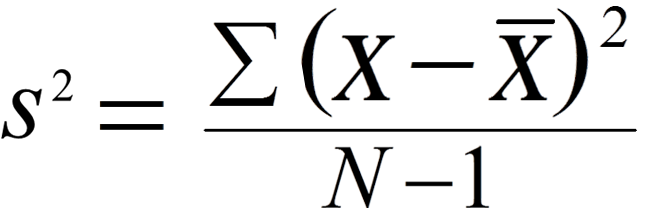

In [26]:
Image("variance-formula.png")

#### Standard Deviation

    The standard deviation is a statistic that measures the dispersion of a dataset relative to its mean and is calculated as the square root of the variance. 

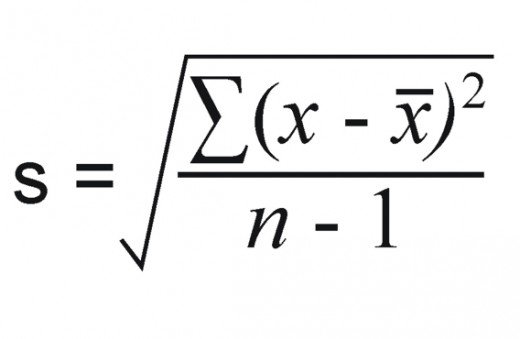

In [27]:
Image("standard deviation.jpg")

#### What is Covariance?

    Covariance provides insight into how two variables are related to one another. 

    More precisely, covariance refers to the measure of how two random variables in a data set will change together. 


A positive covariance means that the two variables at hand are positively related, and they move in the same direction. 

A negative covariance means that the variables are inversely related, or that they move in opposite directions. 

#### How to Calculate Covariance?

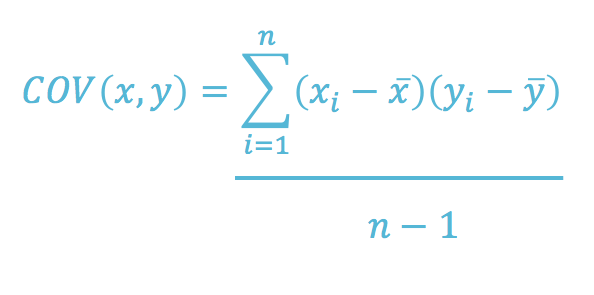

In [28]:
Image("covariance-formula.png")

#### Correlation

    In addition to telling you whether variables are positively or inversely related, correlation also tells you the degree to which the variables tend to move together.

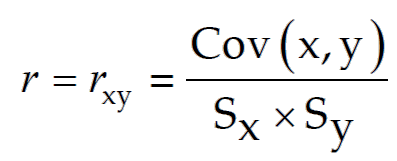

In [29]:
Image("pearsoncorrelation.png")

If the correlation coefficient is one, the variables have a perfect positive correlation. 

    This means that if one variable moves a given amount, the second moves proportionally in the same direction. 

If correlation coefficient is zero, no relationship exists between the variables. 

    If one variable moves, you can make no predictions about the movement of the other variable; they are uncorrelated.

If correlation coefficient is –1, the variables are perfectly negatively correlated (or inversely correlated) and move in opposition to each other.

    If one variable increases, the other variable decreases proportionally. 

In [55]:
data[num_attr].corr()

,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,TotalRevenueGenerated
NoOfChildren,1.000000,-0.352499,0.461332,0.086583,0.138507,0.138244,0.166536,0.214226,0.131843,0.108509
MinAgeOfChild,-0.352499,1.000000,0.267846,-0.163155,-0.101041,-0.091638,-0.090152,-0.117580,-0.085494,-0.027536
MaxAgeOfChild,0.461332,0.267846,1.000000,-0.044098,-0.004977,-0.012761,-0.002393,0.017606,-0.011047,0.001929
Tenure,0.086583,-0.163155,-0.044098,1.000000,0.192672,0.191555,0.240035,0.271724,0.187720,0.115241
FrquncyOfPurchase,0.138507,-0.101041,-0.004977,0.192672,1.000000,0.933894,0.278690,0.396333,0.947788,0.662371
NoOfUnitsPurchased,0.138244,-0.091638,-0.012761,0.191555,0.933894,1.000000,0.310436,0.434564,0.868113,0.749679
FrequencyOFPlay,0.166536,-0.090152,-0.002393,0.240035,0.278690,0.310436,1.000000,0.738154,0.285390,0.231888
NoOfGamesPlayed,0.214226,-0.117580,0.017606,0.271724,0.396333,0.434564,0.738154,1.000000,0.397942,0.291398
NoOfGamesBought,0.131843,-0.085494,-0.011047,0.187720,0.947788,0.868113,0.285390,0.397942,1.000000,0.494442
TotalRevenueGenerated,0.108509,-0.027536,0.001929,0.115241,0.662371,0.749679,0.231888,0.291398,0.494442,1.000000


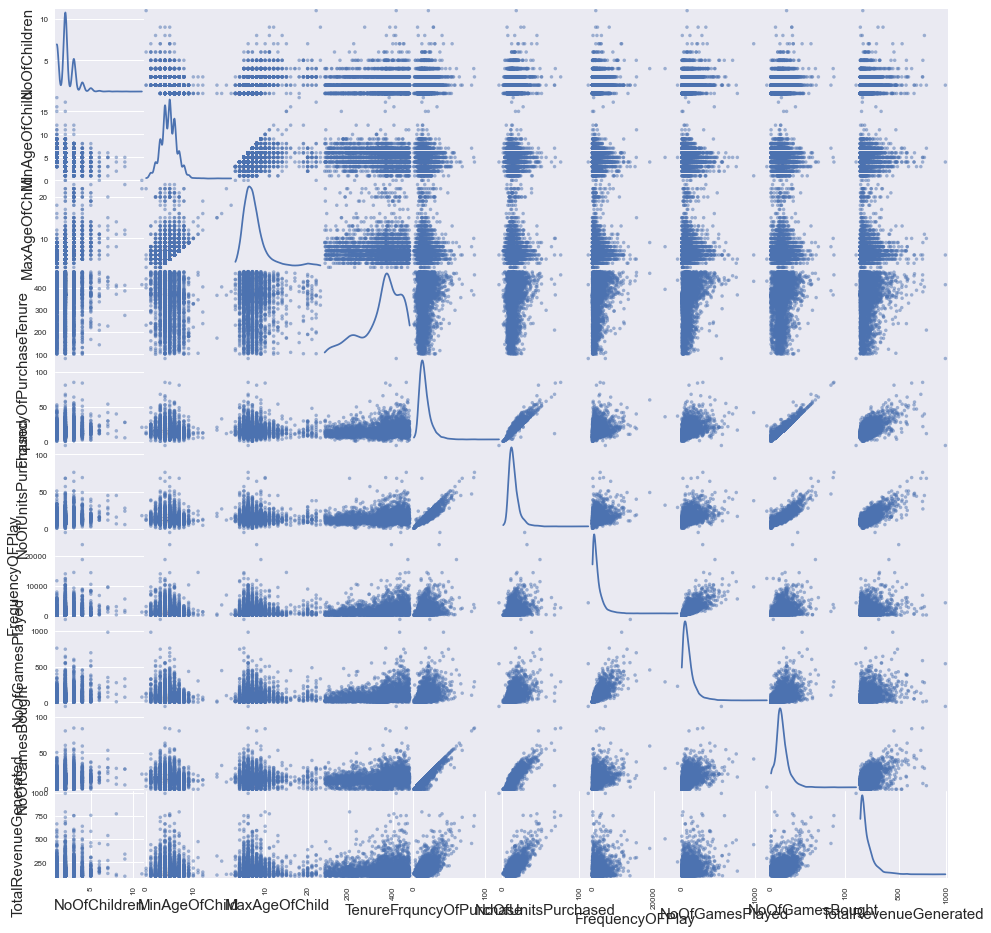

In [56]:
pd.plotting.scatter_matrix(data, figsize=(16, 16), diagonal='kde')
plt.show()

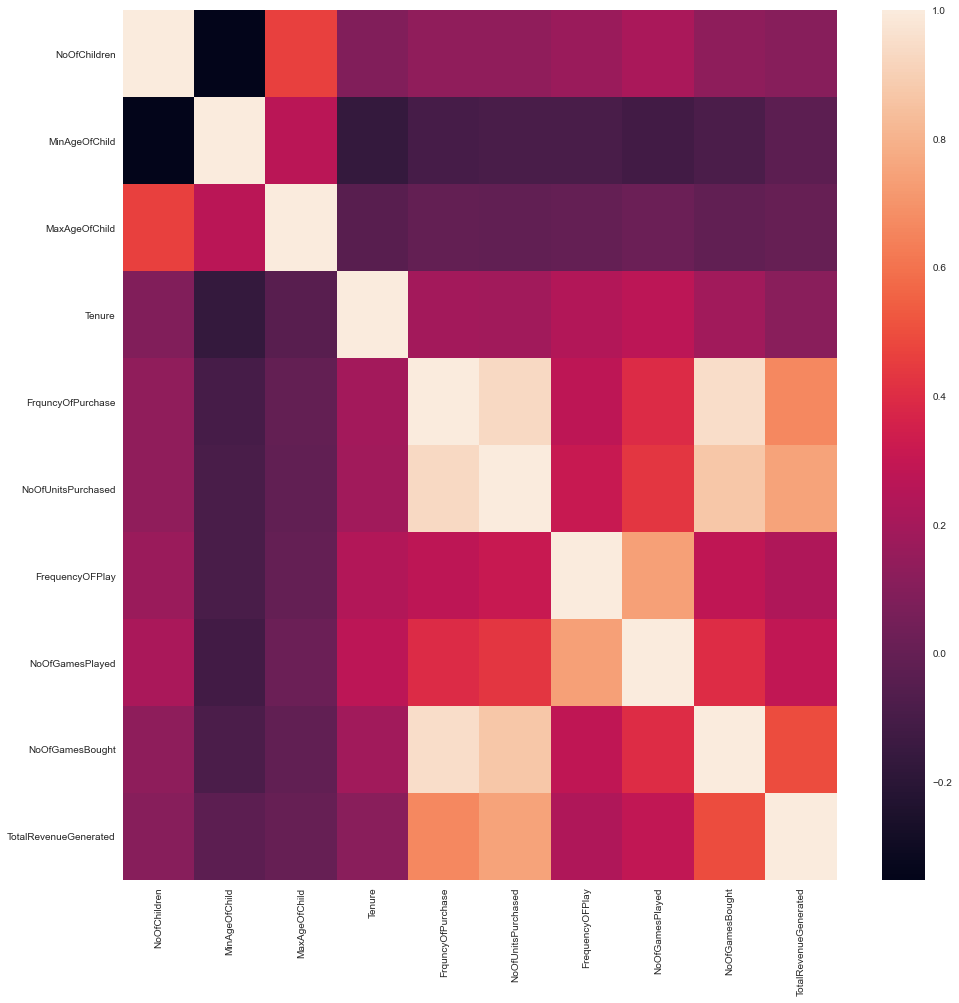

Note :-A correlation of 0 means that no relationship exists between the two variables, whereas a correlation of 1 indicates a perfect positive relationship.


In [57]:
plt.figure(figsize=(16,16))
sns.heatmap(data.corr())
plt.show()

print("Note :-A correlation of 0 means that no relationship exists between the two variables, whereas a correlation of 1 indicates a perfect positive relationship.")

# Exploratory Data Analysis

# Uni-variate Analysis

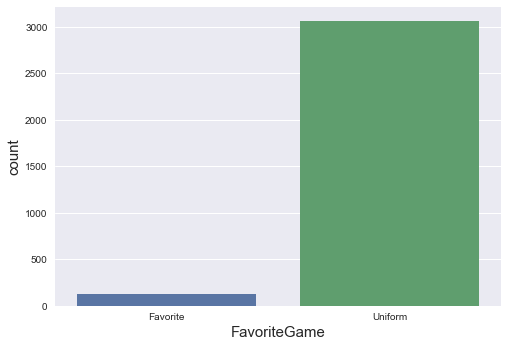

In [59]:
# Plotting Categorical Data
sns.countplot(x="FavoriteGame", data=data)
plt.show()


# Bi-variate Analysis

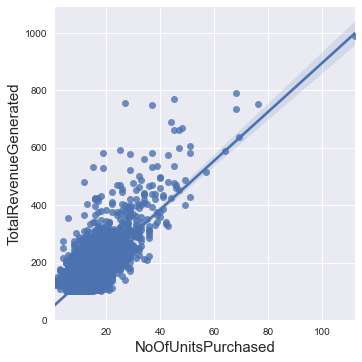

In [60]:
# Plotting Numeric VS Numeric Data

sns.lmplot(x='NoOfUnitsPurchased', y='TotalRevenueGenerated', data=data)
plt.show()

# There are more rows for the favourite game "uniform" so total revenue generated is also more.

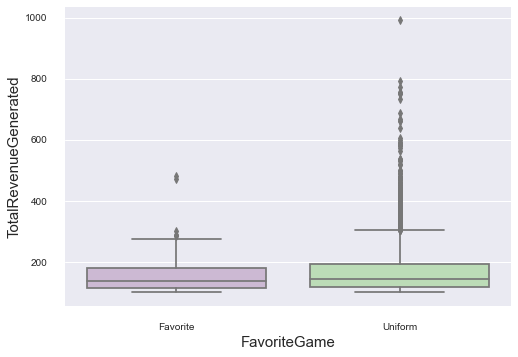

In [61]:
# Plotting Numeric VS Categorical Data

sns.boxplot(x="FavoriteGame", y="TotalRevenueGenerated", data=data, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.show()

## Building a Linear Model

### Simple Linear Regression

Simple linear regression is an approach for predicting a quantitative response using a single feature (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?

$y$ is the response
    
$x$ is the feature
    
$\beta_0$ is the intercept
    
$\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the model coefficients. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict TotalRevenueGenerated!

#### Estimating ("Learning") Model Coefficients

Generally speaking, coefficients are estimated using the least squares criterion, which means we find the line (mathematically) which minimizes the sum of squared residuals (or "sum of squared errors"):

<img src="08_estimating_coefficients.png">

What elements are present in the diagram?

* The black dots are the observed values of x and y.
* The blue line is our least squares line.
* The red lines are the residuals, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?

* $\beta_0$ is the intercept (the value of $y$ when $x$=0)
* $\beta_1$ is the slope (the change in $y$ divided by change in $x$)

Here is a graphical depiction of those calculations:

<img src="08_slope_intercept.png">

# Simple Linear Regression using Statsmodels package

# -1 is used for TotalRevenueGenerated and 1 is used for NoOfChildren

In [62]:
formula = " ~ ".join((data.columns.values[-1], data.columns.values[1]))
print (formula)

TotalRevenueGenerated ~ NoOfChildren


#### Model fit and summary

Fitting a model in statsmodels typically involves 3 easy steps:

    Use the model class to describe the model
    Fit the model using a class method
    Inspect the results using a summary method


In [69]:
mod = smf.ols(formula=formula, data=data) # Describe model

res = mod.fit()                           # Fit model

print(res.summary())                                          # Summarize model

                              OLS Regression Results                             
Dep. Variable:     TotalRevenueGenerated   R-squared:                       0.012
Model:                               OLS   Adj. R-squared:                  0.011
Method:                    Least Squares   F-statistic:                     37.97
Date:                   Sun, 07 Aug 2022   Prob (F-statistic):           8.08e-10
Time:                           13:38:11   Log-Likelihood:                -18552.
No. Observations:                   3189   AIC:                         3.711e+04
Df Residuals:                       3187   BIC:                         3.712e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      150

# Simple Linear Regression with Categorical Attribute

# -1 is used for TotalRevenueGenerated and 0 is used for City

In [70]:
formula = " ~ ".join((data.columns.values[-1], data.columns.values[0]))
print (formula)

TotalRevenueGenerated ~ City


In [72]:
mod = smf.ols(formula=formula, data=data) # Describe model

res = mod.fit()                           # Fit model

print(res.summary())                                          # Summarize model

                              OLS Regression Results                             
Dep. Variable:     TotalRevenueGenerated   R-squared:                       0.005
Model:                               OLS   Adj. R-squared:                  0.005
Method:                    Least Squares   F-statistic:                     16.23
Date:                   Sun, 07 Aug 2022   Prob (F-statistic):           5.75e-05
Time:                           13:40:16   Log-Likelihood:                -18563.
No. Observations:                   3189   AIC:                         3.713e+04
Df Residuals:                       3187   BIC:                         3.714e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    170.5379 

# Mulitple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called multiple linear regression:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times NoOfGamesBought + \beta_2 \times FrquncyOfPurchase + \beta_3 \times NoOfUnitsPurchased$

Let's use Statsmodels to estimate these coefficients:

# Here (-1) is the last column of the data and (: -1 ) means from first column to the last column.

In [73]:
formula = " ~ ".join((data.columns.values[-1], "+".join(data.columns.values[:-1],)))
print(formula)

TotalRevenueGenerated ~ City+NoOfChildren+MinAgeOfChild+MaxAgeOfChild+Tenure+FrquncyOfPurchase+NoOfUnitsPurchased+FrequencyOFPlay+NoOfGamesPlayed+NoOfGamesBought+FavoriteChannelOfTransaction+FavoriteGame


In [74]:
mod = smf.ols(formula=formula, data=data) # Describe model

res = mod.fit()                           # Fit model

print(res.summary())                                          # Summarize model

                              OLS Regression Results                             
Dep. Variable:     TotalRevenueGenerated   R-squared:                       0.721
Model:                               OLS   Adj. R-squared:                  0.720
Method:                    Least Squares   F-statistic:                     684.7
Date:                   Sun, 07 Aug 2022   Prob (F-statistic):               0.00
Time:                           13:48:00   Log-Likelihood:                -16534.
No. Observations:                   3189   AIC:                         3.309e+04
Df Residuals:                       3176   BIC:                         3.317e+04
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

# Calculates residuals and applying the normalization.

# What is a high Cook's distance?

# What is absolute residuals?

# What do squared residuals tell us?

The residual sum of squares (RSS) measures the level of variance in the error term, or residuals, of a regression model. The smaller the residual sum of squares, the better your model fits your data; the greater the residual sum of squares, the poorer your model fits your data.

# What do studentized residuals tell us?

# What does leverage mean in regression?

# What is Q-Q plot?

In [43]:
# fitted values (need a constant term for intercept)

model_fitted_y = res.fittedvalues


# model residuals (storing the model residuls in variable)
model_residuals = res.resid   

# normalized residuals (normalizing the residuals)
model_norm_residuals = res.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals (taking the absolute value of residuals)
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = res.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = res.get_influence().cooks_distance[0]

# What do residual plot suggests?

# A residual plot has the Residual Values on the vertical axis; the horizontal axis displays the independent variable.

# NOTE: Giving the information about the ratio of residuals vs fitted.

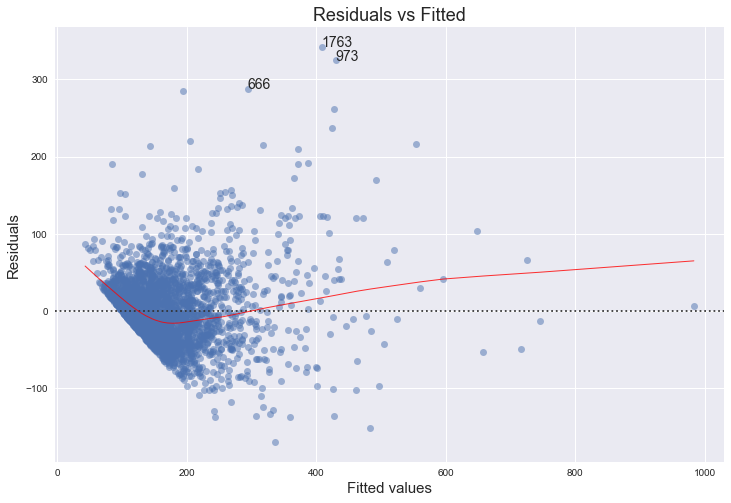

In [44]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'TotalRevenueGenerated', data=data, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

# What do Q Q plot suggests us?

# Note: If the data is normally distributed, the points in a Q-Q plot will lie on a straight diagonal line. Conversely, the more the points in the plot deviate significantly from a straight diagonal line, the less likely the set of data follows a normal distribution.

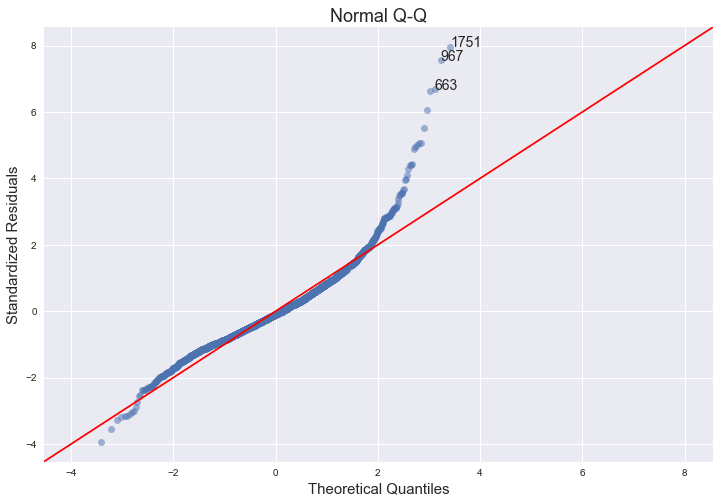

In [45]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

# What does scale location plot tell us?

# NOTE: The primary assumption is residuals are homoscedastic. Homoscedasticity means that they are roughly the same throughout, which means your residuals do not suddenly get larger.

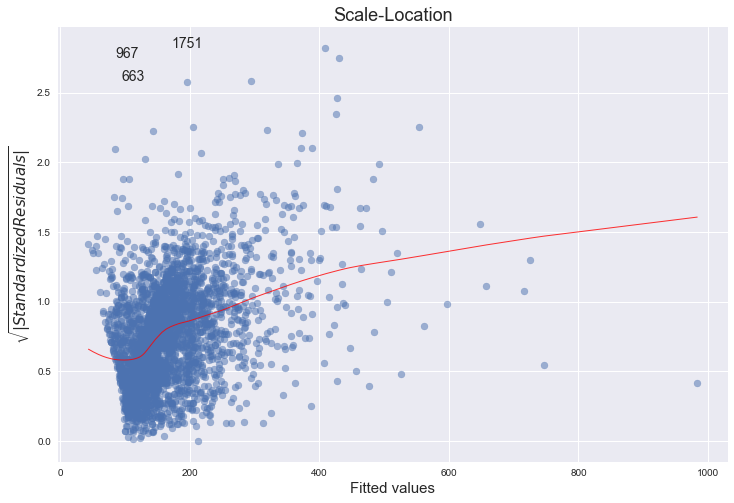

In [46]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]));

# What does Residuals vs Leverage plot tell us ?

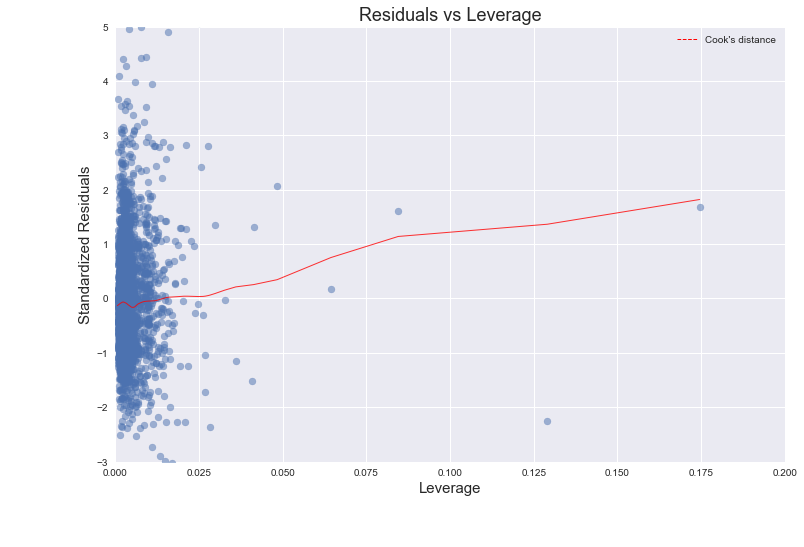

In [47]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(res.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right');

# Use the model top make predictions.

In [48]:
# use the model to make predictions
data_pred = res.predict(data)
print(data_pred[:5])

0    115.274443
1    336.682161
2    182.761644
3    105.726903
4    266.518969
dtype: float64


###### Evaluating model performance

Good the model 

1. One method to check it is by looking at the R^2 value. This gives us the information about how much variance in our target could be explanined by all independent variables. The closer R^2 to 1 the better the model is. This tells us about goodness of our model.
2. Next we check how close our predictions are to the actual values. The difference of actual and predicted is called error. For a good model the error should be as small as possible. There are various kinds of error metrics. In this case we use mean squared error computed as 
1/n*∑(y-(yhat))^2 
where y are the actual values, yhat are the predicted values and n is total number of records.

In [49]:
print("The R2 value on test dataset: {} \n".format(r2_score(y_pred=data_pred, y_true=data.loc[:,"TotalRevenueGenerated"].values)))

print("The Mean Squared Error on train dataset: {} \n".format(mean_squared_error(y_pred=data_pred,y_true=data.loc[:,"TotalRevenueGenerated"].values)))

The R2 value on test dataset: 0.7212281739764823 

The Mean Squared Error on train dataset: 1866.1455870949826 



# MSE can vary from 0 to any larger number. However, in the case of R-squared, the value is bounded between 0 and 1.Unfortunately, there is no 'good' score for MSE, it can only be used to say whether the model has become better or worse at predicting for your target than the previous attempt.

In [ ]:
########################################################## END ################################################################